[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW8.ipynb)

**Prooblem 1:** Rent prices are of high interest to many people right now. Being able to predict rent well is important. Load in a data set of rental prices in India using the following command.

pd.read_csv("https://richardson.byu.edu/220/rent.csv")

The variables are, in order: BHK - number of bedrooms, Rent - rental fees, Size - square feet of space, AreaType - carpet or super, City, Furnished Status - furnished or unfurnished, Preferred - type of renter sought, Bathrooms, and Who to Contact.

Rent is the target variable. All other variables can be used as predictors.

In [10]:
import pandas as pd
df = pd.read_csv("https://richardson.byu.edu/220/rent.csv")
display(df.head())

,BHK,Rent,Size,AreaType,City,FurnishingStatus,Preferred,Bathroom,Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Part a. Determine what each variable is, numeric or categorical, and if they are categorical if they are binary or not.



*   **BHK**: Numeric
*   **Rent**: Numeric
*   **Size**: Numeric
*   **AreaType** (categorical): Binary
*   **City** (categorical): Non-binary
*   **Furnished Status** (categorical): Binary
*   **Preferred** (categorical): Non-binary
*   **Bathrooms**: Numeric
*   **Who to Contact** (categorical): Non-binary categorical

Part b. Plot the target variable, Rent. Does it look skewed right or symmetric?

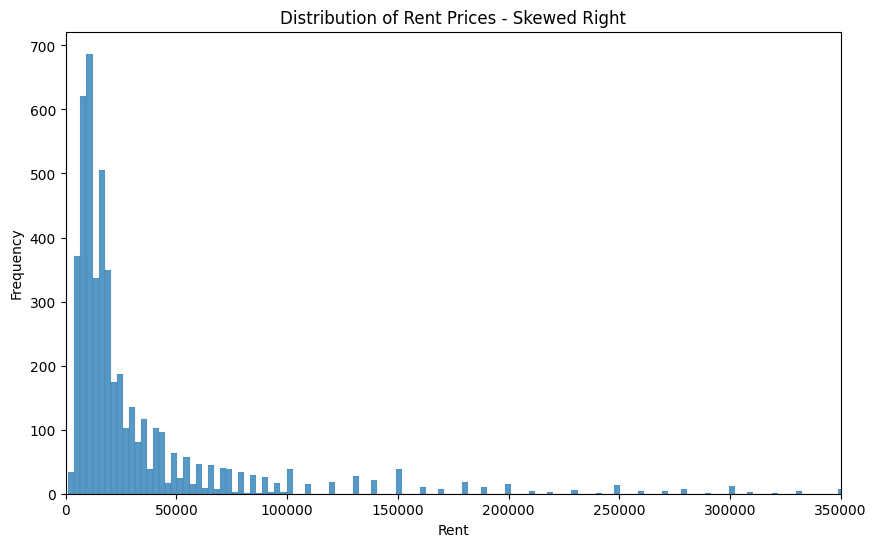

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'])
plt.title('Distribution of Rent Prices - Skewed Right')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.xlim(0, 350000) # Set x-axis limit
plt.show()


Part c. Fit a regression model with rent as the target and the other variables as predictors.

In [18]:
import statsmodels.formula.api as smf
df_model = df.copy()
formula = 'Rent ~ BHK + Size + C(AreaType) + C(City) + C(FurnishingStatus) + C(Preferred) + Bathroom + C(Contact)'
model = smf.ols(formula=formula, data=df_model).fit()


Part d. Plot the fitted values versus the residuals. Does it look like it could use a log transformation.

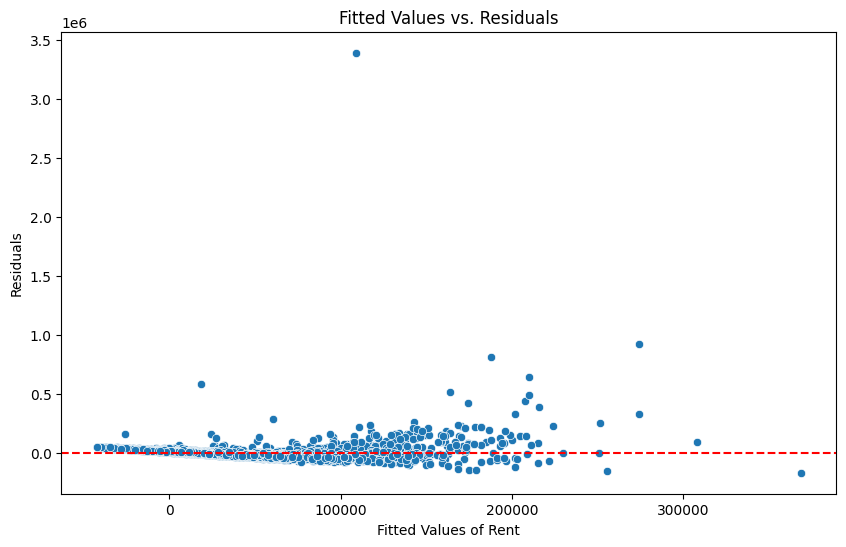

Log transformation might be helpful for stabilizing variance in higher rent values.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
fitted_values = model.fittedvalues
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Fitted Values vs. Residuals')
plt.xlabel('Fitted Values of Rent')
plt.ylabel('Residuals')
plt.show()
print("Log transformation might be helpful for stabilizing variance in higher rent values.")


**Problem 2** Work with the log of rent.

Part a. Plot the log rent. Does it loook more or less symmetric?

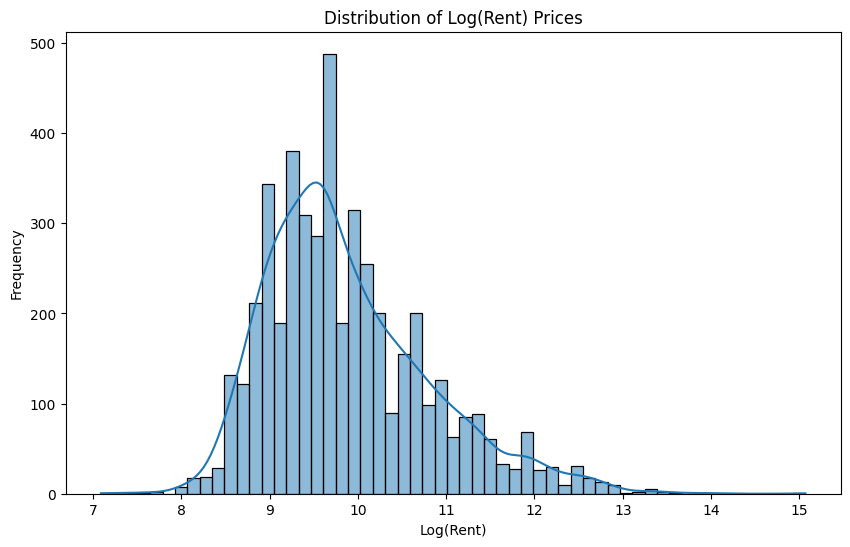

In [22]:
import numpy as np
df_model['log_Rent'] = np.log(df_model['Rent'])
plt.figure(figsize=(10, 6))
sns.histplot(df_model['log_Rent'], kde=True)
plt.title('Distribution of Log(Rent) Prices')
plt.xlabel('Log(Rent)')
plt.ylabel('Frequency')
plt.show()


**It looks more symmetric than the other one.**

Part b. Fit a regression model with log rent as the target and the other variables as predictors.

In [24]:
formula_log_rent = 'log_Rent ~ BHK + Size + C(AreaType) + C(City) + C(FurnishingStatus) + C(Preferred) + Bathroom + C(Contact)'
model_log_rent = smf.ols(formula=formula_log_rent, data=df_model).fit()


Part c. Plot the fitted values versus residuals. Does this look any better?

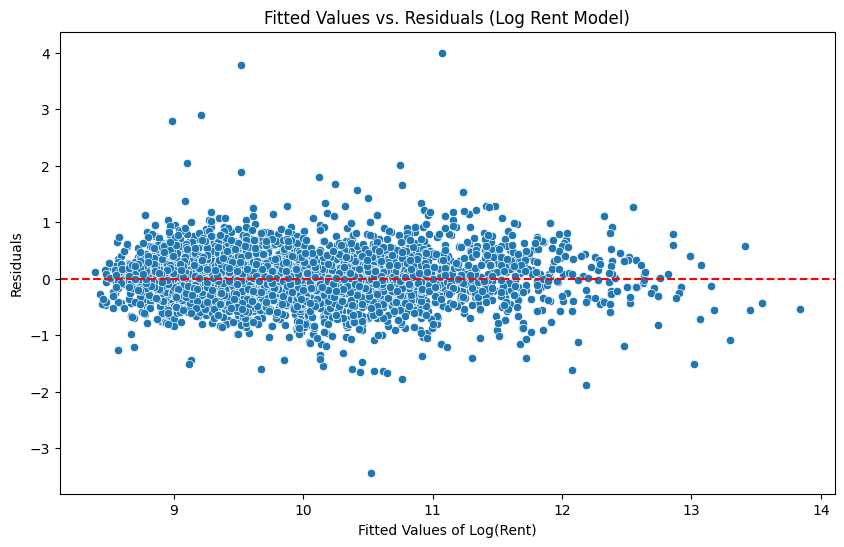

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fitted_values_log = model_log_rent.fittedvalues
residuals_log = model_log_rent.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values_log, y=residuals_log)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Fitted Values vs. Residuals (Log Rent Model)')
plt.xlabel('Fitted Values of Log(Rent)')
plt.ylabel('Residuals')
plt.show()


Part d. Use out of sample R^2 too determine which model is better.

**Problem 3** Check if predictors need a log transformation.

Part a. Fit another model where the predictor variable Size is given a log transformation as well as Rent.

Part b. Compare the p value Size in the model where Size is untransformed against the p value for log Size in the model with log Size. Is one or both significant.

Part c. Check out of sample R^2 in both models. Does taking the log of size improve the model?

**Problem 4** Use the same Rent data to explore standardizing.

Part a. Use the data set with log Rent. Standardize the training data and fit a linear regression model.

Part b. Check the p-values for the variables in this model against the model without standardization. Are there any differences?

Part c. Use the standardization on the test set and make predictions for the model. Transform those predictions back to the original (log)scale.

**Problem 4**: The data set machine.csv can be loaded using the code

machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")

The target variable is the cost to maintain a certain type of energy production machinery. The predictors are weight of the machine, the attitude of the region the machine is located towards coal and oil refinery, the type of machine (front or back loading) and the industry the machine is in (coal or oil).

**Part a.** Build and tune a linear regression model to predict the target variable, Cost, using all the other variables besides car_name as predictors.  Tune the model so that only significant features remain.

**Part b.** Plot the Cost of the machine against Weight. Distinguish the color of each. point based on the type of Industry. Repeat this to make plots for Cost against Weight with colors distinguished for attitude and machine type.

**Part c.** Try building a model with only Weight, Industry, and an interaction between Wieght and Industry as predictors. Interpret the meaning of the coefficients in this case.

**Part d.** Plot the fitted regression lines for the model in Part c on top of the plot between Weight and Cost, with the data colored according to Industry.

**Problem 5.**

**Part a.** For the model created in Problem 4a, using all the variables in the model tuned to significant features, report the out of sample R^2 value.

**Part b**. Start with a model with all the predictors. Add in Weight^2 and interactions between weight and each other predictor. Tune the model to keep only significant features. Report the out of sample R^2 for this model.